# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы Мосева Алеся Сергеевна БВТ2002
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [34]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy
import time
inf = np.iinfo('int').max - 50

In [3]:
def read_graph(path):
    matrix = []
    with open(path, 'r') as f:
        for line in f:
            numbers = []
            for num in line.split():
                numbers.append(int(num))
            matrix.append(numbers)
    return nx.from_numpy_matrix(np.matrix(matrix), create_using=nx.DiGraph)

def get_matrix_with_inf(matrix):
    inf = np.iinfo('int').max
    new_matrix=[]
    for i in range(len(matrix)):
        new_matrix.append([])
        for j in range(len(matrix)):
            if matrix[i, j] == 0 and j != i:
                new_matrix[i].append(inf-1000)
            else:
                new_matrix[i].append(matrix[i, j])
    return new_matrix

def draw_graph(graph, path = None):
    colors = None
    if path:
        colors = []
        for item in graph.edges():
            try:
                index1 = path.index(item[0])
                index2 = path.index(item[1])
                if index1 + 1 != index2 and index1 - 1 != index2:
                    raise
                colors.append('red')
            except:
                colors.append('black')
    pos = nx.circular_layout(graph)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_nodes(graph, node_color = 'green', node_size = 200, pos = pos)
    nx.draw_networkx_edges(graph,edge_color = colors, pos = pos, arrowstyle = 'simple, tail_width = 0.05')
    nx.draw_networkx_labels(graph, pos = pos)
    nx.draw_networkx_edge_labels(graph, pos = pos, edge_labels = labels)



#### Алгоритм Флойда-Уоршелла

[7, 6, 5, 4, 0]
7


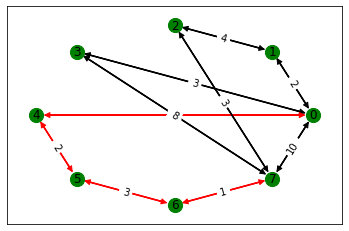

In [6]:
def get_path(P, end, start):
    path = [end]
    while end != start:
        end = P[end][start]
        path.append(end)
    return path


def floid(graph, start, end):
    matrix = nx.adjacency_matrix(graph).todense()
    matrix = get_matrix_with_inf(matrix)
    N = len(matrix)
    P = [[i for i in range(N)] for j in range(N)]

    for k in range(N):
        for i in range(N):
            for j in range(N):
                d = matrix[i][k] + matrix [k][j]
                if d < matrix[i][j]:
                    matrix[i][j] = d
                    P[i][j] = k
    path = get_path(P, end, start)
    print(path)
    print(matrix[start][end])
    draw_graph(graph, path)

graph = read_graph('mat.txt')
start = 0
end = 7
floid(graph, start, end)
    




    

#### Алгоритм Дейкстры

7


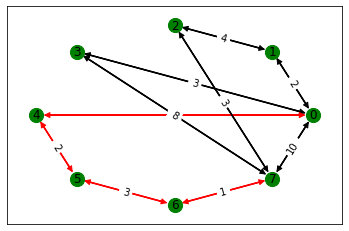

In [7]:

def arg_min(dist, visited):
    amin = -1
    m = inf
    for i, weight in enumerate(dist):
        if weight < m and i not in visited:
            m = weight
            amin = i
    return amin

def get_path(for_path, start, end):
    path = [end]
    while end != start:
        end = for_path[path[-1]]
        path.append(end)
    return path

def deikstra(graph, start):
    matrix = nx.adjacency_matrix(graph).todense()
    matrix = get_matrix_with_inf(matrix)
    n = len(matrix)
    table = [inf] * n
    visited = {start}
    table[start] = 0
    for_path = [0] * n
    while start != -1:
        for j, weight in enumerate(matrix[start]):
            if j not in visited:
                w = table[start] + weight
                if w < table[j]:
                    table[j] = w
                    for_path[j] = start
        start = arg_min(table, visited)
        if start >= 0:
            visited.add(start)
    return table, for_path


graph = read_graph('mat.txt')
start = 0
end = 7
table, for_path = deikstra(graph, start)
path = get_path(for_path, start, end)
print(table[end])
draw_graph(graph, path)



#### Алгоритм Форда-Беллмана

7


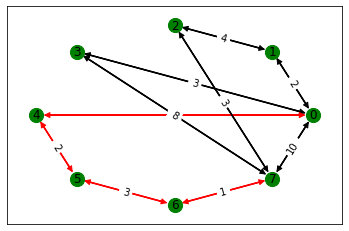

In [37]:
def ford_bellman(graph, start):
    matrix = nx.adjacency_matrix(graph).todense()
    matrix = get_matrix_with_inf(matrix)
    n = len(matrix)
    for_path = [0] * n
    table = [inf for i in range(n)]
    table[start] = 0
    for i in range(n):
        for j in range(n):
            for k in range(n):
                w = table[j] + matrix[j][k]
                if w < table[k]:
                    table[k] = w
                    for_path[k] = j
    return table, for_path
                    
graph = read_graph('mat.txt')
start = 0
end = 7
table, for_path = ford_bellman(graph, start)
path = get_path(for_path, start, end)
print(table[end])
draw_graph(graph, path)


#### Алгоритм Джонсона

/var/folders/zv/thrprk2d021_74h0y0zg7z240000gn/T/ipykernel_21929/90677788.py:11: RuntimeWarning: overflow encountered in long_scalars
  w = table[j] + matrix[j][k]


7


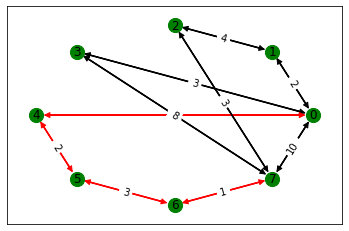

In [9]:
def gonson(graph, start):
    matrix = nx.adjacency_matrix(graph).todense()
    matrix = get_matrix_with_inf(matrix)
    for i in range(len(matrix)):
        matrix[i].append(inf)
    matrix.append([])
    for i in range(len(matrix)):
        matrix[-1].append(0)
    table = ford_bellman(nx.from_numpy_matrix(np.array(matrix)), len(matrix)-1)[0]
    n = len(matrix)
    for i in range(n):
        for j in range(n):
            if table[i] != inf and table[j] != inf:
                matrix[i][j] += table[i] - table[j]
    table, for_path = deikstra(nx.from_numpy_matrix(np.array(matrix), create_using=nx.DiGraph), start)
    return table, for_path


graph = read_graph('mat.txt')
start = 0
end = 7
table, for_path = gonson(graph, start)
path = get_path(for_path, start, end)
print(table[end-1])
draw_graph(graph, path)


#### Алгоритм Левита

7


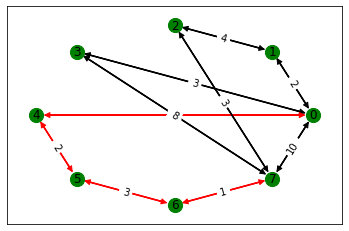

In [25]:
def levit(graph, start):
    matrix = nx.adjacency_matrix(graph).todense()
    matrix = get_matrix_with_inf(matrix)
    n = len(matrix)
    table = [inf for i in range(n)]
    table[start] = 0
    for_paths = [start for i in range(n)]
    m0 = set()
    m1 = [start]
    m2 = set(range(n))
    m2.remove(start)
    while len(m1):
        u = None #рассматриваемая вершина
        if len(m1):
            u = m1.pop(0)
        for i in range(n):
            if matrix[u][i] == inf:
                continue
            if i in m2:
                m2.remove(i)
                m1.append(i)
                w = table[u] + matrix[u][i]
                if w < table[i]:
                    table[i] = w
                    for_paths[i] = u
            elif i in m1:
                w = table[u] + matrix[u][i]
                if w < table[i]:
                    table[i] = w
                    for_paths[i] = u
            elif i in m0 and table[i] > table[u] + matrix[u][i]:
                m0.remove(i)
                m1.append(i)
                table[i] = table[u] + matrix[u][i]
                for_paths[i] = u
        m0.add(u)
    return table, for_paths

graph = read_graph('mat.txt')
start = 0
end = 7
table, for_path = levit(graph, start)
path = get_path(for_path, start, end)
print(table[end])
draw_graph(graph, path)


#### Алгоритм Йена

In [42]:
def yen(graph, start,end, K):
    candidates = set()
    table, for_path = ford_bellman(graph, start)
    print(table)
    print(for_path)
    matrix = nx.adjacency_matrix(graph).todense()
    matrix = get_matrix_with_inf(matrix)
    path = get_path(for_path, start, end)
    print(path)
    result_path = [path[::-1]]
    resutl_dist = [table[end]]
    print(result_path)
    print(resutl_dist)
    for k in range(K):
        for i in range(1, len(result_path[-1]) - 1):

            mat = copy.deepcopy(matrix)
            spurNode = result_path[-1][i]
            print(spurNode)
            rootPath = result_path[-1][:i+1]
            for path in result_path:
                if rootPath == path[:i+1]:
                    mat[path[i]][path[i+1]] = inf
            print(mat)
            table, for_path = ford_bellman(nx.from_numpy_matrix(np.array(mat)), spurNode)
            print(spurNode)
            print(table)
            print(for_path)
            path = get_path(for_path, spurNode, end)
            path = path[::-1]
            spurPath = path[1:]
            print(spurPath)
            if len(spurPath) == 0:
                continue
            total_path = rootPath
            total_path.extend(spurPath)
            total_path = tuple(total_path)

            total_dist = 0
            for j in range(1, len(total_path)):
                total_dist += matrix[total_path[j - 1]][total_path[j]]
            candidates.add((total_path, total_dist))
        if not len(candidates):
            break
        candidates_l = list(candidates)
        candidates_l.sort(key = lambda x: x[1])
            
        result_path.append(list(candidates_l[0][0]))
        resutl_dist.append(candidates_l[0][1])
            
        candidates.remove(candidates_l[0])
    return resutl_dist, result_path

graph = read_graph('mat.txt')
start = 0
end = 7
k = 2
dists, paths = yen(graph, start, end, k)
print(paths)
for path, dist, i in zip(paths, dists, range(len(paths))):
    print(path)
    print(dist)
    draw_graph(graph, path)  


    

[0, 2, 6, 3, 1, 3, 6, 7]
[0, 0, 1, 0, 0, 4, 5, 6]
[7, 6, 5, 4, 0]
[[0, 4, 5, 6, 7]]
[7]
4
[[0, 2, 9223372036854774807, 3, 1, 9223372036854774807, 9223372036854774807, 10], [2, 0, 4, 9223372036854774807, 9223372036854774807, 9223372036854774807, 9223372036854774807, 9223372036854774807], [9223372036854774807, 4, 0, 9223372036854774807, 9223372036854774807, 9223372036854774807, 9223372036854774807, 3], [3, 9223372036854774807, 9223372036854774807, 0, 9223372036854774807, 9223372036854774807, 9223372036854774807, 8], [1, 9223372036854774807, 9223372036854774807, 9223372036854774807, 0, 9223372036854775757, 9223372036854774807, 9223372036854774807], [9223372036854774807, 9223372036854774807, 9223372036854774807, 9223372036854774807, 2, 0, 3, 9223372036854774807], [9223372036854774807, 9223372036854774807, 9223372036854774807, 9223372036854774807, 9223372036854774807, 3, 0, 1], [10, 9223372036854774807, 3, 8, 9223372036854774807, 9223372036854774807, 1, 0]]
4
[-1051, -1049, -1052, -1052, -1

/var/folders/zv/thrprk2d021_74h0y0zg7z240000gn/T/ipykernel_21929/90677788.py:11: RuntimeWarning: overflow encountered in long_scalars
  w = table[j] + matrix[j][k]


KeyboardInterrupt: 

### Вывод